In [102]:
import numpy as np
import cv2


# Lade das Bild
image_path = 'pictures/landscapes.jpg'
image = cv2.imread(image_path)

# Konvertiere das Bild zu Graustufen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Verwende einen vorab trainierten Haar Cascade Classifier für die Personenerkennung
# Du kannst einen passenden Classifier herunterladen oder trainieren
# Beispiel: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_fullbody.xml
cascade_path = 'haarcascade_fullbody.xml'
body_cascade = cv2.CascadeClassifier(cascade_path)

print(body_cascade)

# Wende den Classifier auf das Bild an
bodies = body_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

print(bodies)

# Iteriere über die erkannten Personen und speichere die Punkte innerhalb jeder Person
for (x, y, w, h) in bodies:
    # Hier kannst du die Punkte innerhalb der Person extrahieren und weiter verarbeiten
    # Beispiel: Punkte in der Mitte der Person
    center_x = x + w // 2
    center_y = y + h // 2
    print(f'Punkt innerhalb der Person: ({center_x}, {center_y})')
    


< cv2.CascadeClassifier 000001CCCDE88450>
[[730 452 119 238]]
Punkt innerhalb der Person: (789, 571)


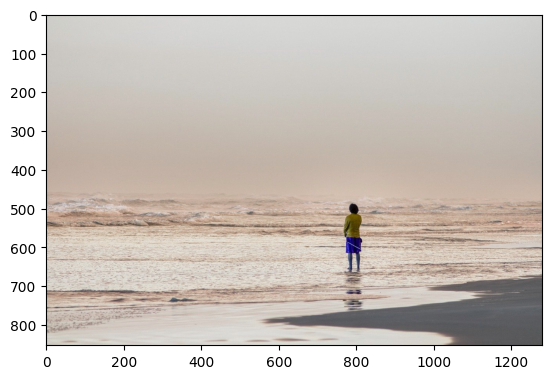

In [103]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

%matplotlib inline
plt.imshow(image)
plt.show()

In [104]:
import cv2
import numpy as np

# Lade das Bild
image_path = 'pictures/cap.jpg'
image = cv2.imread(image_path)

# Konvertiere das Bild zu Graustufen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Verwende einen vorab trainierten Haar Cascade Classifier für die Personenerkennung
cascade_path = 'haarcascade_profileface.xml'
body_cascade = cv2.CascadeClassifier(cascade_path)

# Wende den Classifier auf das Bild an
bodies = body_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Stelle sicher, dass mindestens eine Person erkannt wurde
if len(bodies) > 0:
    # Extrahiere die Koordinaten der ersten erkannten Person
    x, y, w, h = bodies[0]

    # Berechne zwei Punkte innerhalb der Person
    point_inside_1 = (x + w // 3, y + h // 3)
    point_inside_2 = (x + 2 * w // 3, y + 2 * h // 3)

    # Berechne einen Punkt außerhalb der Person
    #point_outside = (x, y)  # Zum Beispiel 50 Pixel nach oben und links verschieben
    #point_outside = (x + w - 50// 3, y + h -50 // 3)

    print(f'Punkt innerhalb der Person 1: {point_inside_1}')
    print(f'Punkt innerhalb der Person 2: {point_inside_2}')
   # print(f'Punkt außerhalb der Person: {point_outside}')
    
    print(x)
    print(y)

else:
    print('Keine Person(en) auf dem Bild gefunden.')


Punkt innerhalb der Person 1: (681, 238)
Punkt innerhalb der Person 2: (759, 316)
603
160


In [105]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

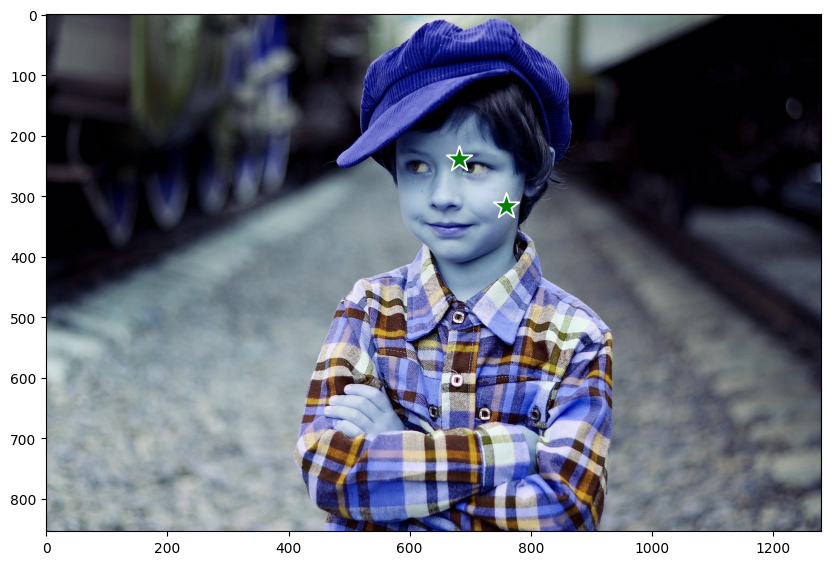

In [106]:
#input_point = np.array([point_inside_1, point_inside_2, point_outside])
#input_label = np.array([1, 1, 0])
input_point = np.array([point_inside_1, point_inside_2])
input_label = np.array([1, 1])


plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  